In [ ]:
import datetime


In [93]:
%%time
import snscrape.modules.twitter as sntwitter
from datetime import datetime,timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd
def run_the_tweet(keywords,incident_date, n_months, min_retweets, language):
    date_format = '%Y-%m-%d'
    dtObj = datetime.strptime(incident_date, date_format)
    begin_date = (dtObj - relativedelta(months=n_months)).date()
    since_date = (dtObj - relativedelta(months=n_months)).date()
    until_date = since_date + timedelta(days=1)
    final_date = (dtObj + relativedelta(months=n_months)).date()
    print(f'begin:{begin_date} final: {final_date}')
    print((final_date-since_date).days)
    n_days = (final_date-since_date).days
    query = " AND ".join(keywords)
    tweets_list= []
    for x in range(n_days): #no. of days
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{query} since:{since_date.strftime(date_format)} until:{until_date.strftime(date_format)}  min_retweets:{min_retweets} lang:{language}').get_items()):
            if i > 50: #no. of output tweet
                break
            else:
                tweets_list.append([tweet.date, tweet.retweetCount, tweet.likeCount, tweet.content, tweet.user.username]) #append if statement satisfy
        if x < n_days : # no. of days you want to be return
            since_date = since_date + timedelta(days=1) #add another day
            until_date = until_date + timedelta(days=1) #add another day
        else:
            break
    tweets_df = pd.DataFrame(tweets_list, columns=['Datetime',"retweet","likes", 'Text', 'Username'])
    return tweets_df
text = run_the_tweet(["Marilyn Manson"], "2021-02-01" ,6, "2", "en")

cb = run_the_tweet(["Chris brown"], "2022-01-28", 6, "10", "en")
cb

begin:2020-08-01 final: 2021-08-01
365
begin:2021-07-28 final: 2022-07-28
365
CPU times: user 32.2 s, sys: 2.63 s, total: 34.8 s
Wall time: 26min 36s


,Datetime,retweet,likes,Text,Username
0,2021-07-28 22:37:39+00:00,11,10,Chris brown here’s your chance! https://t.co/Y...,nottramar
1,2021-07-28 21:40:45+00:00,21,55,You need to tell me how many NBA all stars are...,greatoutsider
2,2021-07-28 21:15:15+00:00,35,62,Me de3 ur Kwasia pressure no go barb me ooo ag...,theGentleGuy_
3,2021-07-28 19:57:17+00:00,67,289,Chris brown said these hoes ain’t loyal in 201...,DineroJaIen
4,2021-07-28 19:37:01+00:00,10,31,"Wizkid international collaboration: Drake, Bey...",ChiefChibuzo
...,...,...,...,...,...
9022,2022-07-27 09:41:37+00:00,26,120,📹 — Chris Brown performando “Ain’t No Way” ont...,AcessoCB
9023,2022-07-27 08:05:23+00:00,19,60,Chris Brown performing “Call Me Every Day“ in ...,BIGdrakerr
9024,2022-07-27 07:54:16+00:00,54,51,Another Blessed day to Keep Streaming this Ble...,heisnaheem
9025,2022-07-27 07:28:33+00:00,55,65,"Dallas airport shooter, Portia Odufuwa, claime...",fredericknuetei


In [94]:
cb["Text"][6]

'Chris Brown really has huge star power, the cancel culture didn’t really have much effect on him, he’s too good and too big, he survived it.'

In [95]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

import string
import re

from wordcloud import STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

lemmatizer = WordNetLemmatizer()
eng_stop_words = list(stopwords.words('english'))
emoji = list(UNICODE_EMOJI.keys())

def clean_text(text):
    #changing to lowercase
    text = text.lower()
    # removing @ and links
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+','',text)
    #removing punctuatuon and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    #tokenizing words and removing stop words from text
    tokens = word_tokenize(text)
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    #lemmetizing words
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text
#run the function
cb['Text'] = cb['Text'].apply(clean_text)
cb

,Datetime,retweet,likes,Text,Username
0,2021-07-28 22:37:39+00:00,11,10,chris brown here chance,nottramar
1,2021-07-28 21:40:45+00:00,21,55,need tell many nba star outside albumyou imagi...,greatoutsider
2,2021-07-28 21:15:15+00:00,35,62,de ur kwasia pressure go barb ooo agye see u d...,theGentleGuy_
3,2021-07-28 19:57:17+00:00,67,289,chris brown said hoe aint loyal proving bro ri...,DineroJaIen
4,2021-07-28 19:37:01+00:00,10,31,wizkid international collaboration drake beyon...,ChiefChibuzo
...,...,...,...,...,...
9022,2022-07-27 09:41:37+00:00,26,120,chris brown performando aint way ontem em nova...,AcessoCB
9023,2022-07-27 08:05:23+00:00,19,60,chris brown performing call every day new jersey,BIGdrakerr
9024,2022-07-27 07:54:16+00:00,54,51,another blessed day keep streaming blessed son...,heisnaheem
9025,2022-07-27 07:28:33+00:00,55,65,dallas airport shooter portia odufuwa claimed ...,fredericknuetei


In [96]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

import string
import re

from wordcloud import STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

lemmatizer = WordNetLemmatizer()


#eng_stop_words = list(stopwords.words('english'))
emoji = list(UNICODE_EMOJI.keys())

def clean_text(text):
    #changing to lowercase
    text = text.lower()
    # removing @ and links
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+','',text)
    #removing punctuatuon and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    #tokenizing words and removing stop words from text
    tokens = word_tokenize(text)
    #filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in tokens if w not in emoji]
    #lemmetizing words
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text
#run the function
cb['New_text'] = cb['Text'].apply(clean_text)
cb.head()

,Datetime,retweet,likes,Text,Username,New_text
0,2021-07-28 22:37:39+00:00,11,10,chris brown here chance,nottramar,chris brown here chance
1,2021-07-28 21:40:45+00:00,21,55,need tell many nba star outside albumyou imagi...,greatoutsider,need tell many nba star outside albumyou imagi...
2,2021-07-28 21:15:15+00:00,35,62,de ur kwasia pressure go barb ooo agye see u d...,theGentleGuy_,de ur kwasia pressure go barb ooo agye see u d...
3,2021-07-28 19:57:17+00:00,67,289,chris brown said hoe aint loyal proving bro ri...,DineroJaIen,chris brown said hoe aint loyal proving bro ri...
4,2021-07-28 19:37:01+00:00,10,31,wizkid international collaboration drake beyon...,ChiefChibuzo,wizkid international collaboration drake beyon...


In [97]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

import string
import re

from wordcloud import STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

lemmatizer = WordNetLemmatizer()
eng_stop_words = list(stopwords.words('english'))
emoji = list(UNICODE_EMOJI.keys())

def clean_text(text):
    #changing to lowercase
    text = text.lower()
    # removing @ and links
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+','',text)
    #removing punctuatuon and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    #tokenizing words and removing stop words from text
    tokens = word_tokenize(text)
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    #lemmetizing words
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text
#run the function
cb['Text'] = cb['Text'].apply(clean_text)
cb

,Datetime,retweet,likes,Text,Username,New_text
0,2021-07-28 22:37:39+00:00,11,10,chris brown chance,nottramar,chris brown here chance
1,2021-07-28 21:40:45+00:00,21,55,need tell many nba star outside albumyou imagi...,greatoutsider,need tell many nba star outside albumyou imagi...
2,2021-07-28 21:15:15+00:00,35,62,de ur kwasia pressure go barb ooo agye see u d...,theGentleGuy_,de ur kwasia pressure go barb ooo agye see u d...
3,2021-07-28 19:57:17+00:00,67,289,chris brown said hoe aint loyal proving bro ri...,DineroJaIen,chris brown said hoe aint loyal proving bro ri...
4,2021-07-28 19:37:01+00:00,10,31,wizkid international collaboration drake beyon...,ChiefChibuzo,wizkid international collaboration drake beyon...
...,...,...,...,...,...,...
9022,2022-07-27 09:41:37+00:00,26,120,chris brown performando aint way ontem em nova...,AcessoCB,chris brown performando aint way ontem em nova...
9023,2022-07-27 08:05:23+00:00,19,60,chris brown performing call every day new jersey,BIGdrakerr,chris brown performing call every day new jersey
9024,2022-07-27 07:54:16+00:00,54,51,another blessed day keep streaming blessed son...,heisnaheem,another blessed day keep streaming blessed son...
9025,2022-07-27 07:28:33+00:00,55,65,dallas airport shooter portia odufuwa claimed ...,fredericknuetei,dallas airport shooter portia odufuwa claimed ...


In [6]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

# model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

In [7]:
# sentiment_task = pipeline("sentiment-analysis", model= model, tokenizer= tokenizer, top_k=3)
# for i in text["New_text"]:
#     print(sentiment_task(i))

In [98]:
cb.isna().sum()

Datetime    0
retweet     0
likes       0
Text        0
Username    0
New_text    0
dtype: int64

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [100]:
#Extra processing before visualization

stop2 = stopwords.words('english')

manual_sw_list = ['chris', 'brown', 'new', 'chrisbrown', 'music', 'amp', 'yall', 'tell', 'cant','people', 'retweet', 'retwet', 'rt', 'oh', 'dm', 'mt', 'ht', 'ff', 'shoulda', 'woulda', 'coulda', 'might', 'im', 'tb', 'mysql', 'hah', "a", "an", "the", "and", "but", "if",
"or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over",
"under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "nor", "only", "own", "same", "so", "than", "too", "very", "s",
"t", "just", "don", "now", 'tweet', 'x', 'f']

stop2.extend(manual_sw_list)

In [102]:
cb['Text'] = cb['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))
print(cb.head())

                   Datetime  retweet  likes  \
0 2021-07-28 22:37:39+00:00       11     10   
1 2021-07-28 21:40:45+00:00       21     55   
2 2021-07-28 21:15:15+00:00       35     62   
3 2021-07-28 19:57:17+00:00       67    289   
4 2021-07-28 19:37:01+00:00       10     31   

                                                Text       Username  \
0                                             chance      nottramar   
1  need many nba star outside albumyou imagine dr...  greatoutsider   
2  de ur kwasia pressure go barb ooo agye see u d...  theGentleGuy_   
3   said hoe aint loyal proving bro right ever since    DineroJaIen   
4  wizkid international collaboration drake beyon...   ChiefChibuzo   

                                            New_text  
0                            chris brown here chance  
1  need tell many nba star outside albumyou imagi...  
2  de ur kwasia pressure go barb ooo agye see u d...  
3  chris brown said hoe aint loyal proving bro ri...  
4  wizkid inter

In [103]:
new = " ".join(cat for cat in cb.Text)
new

'chance need many nba star outside albumyou imagine draketychris brownmajor lazer outside albuman album lineup yet cross spotify stream year even lead single de ur kwasia pressure go barb ooo agye see u den perform stage dah one wont happen said hoe aint loyal proving bro right ever since wizkid international collaboration drake beyonc damian marley dave skepta ty dolla metro boomin ella mai trey songz french montana major lazer justine skye emtee akon trying prove collab comin see horizon really huge star power cancel culture didnt really much effect good big survived unfollow support dababytory lanezlil na brownmy account safe place carrying rampb year watch dababy tory collab album beatemup vocal next month practice reach end lamar jackson absent mcsorley accurate receiver cook db accuracy separation westry strong day shaun wade struggle perimeter dobbin flash hand raven work center portion day young thug gtgtgtgt nowplaying shopping spree davido young thug tidal throwback wizkid pe

In [104]:
word_cloud = WordCloud(collocations = False, background_color='white').generate(new)

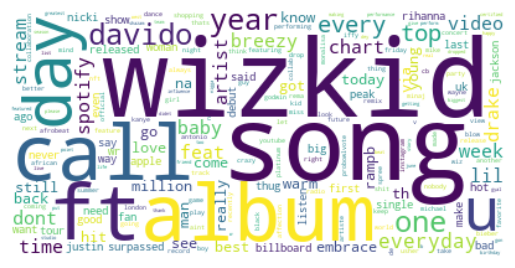

In [105]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()